# Data Analysis

## 1. Data Loading

### 1.1 Data Prep for LineUp Data 2022/23

In [24]:
import pandas as pd

# Load the datasets
#lineups_1 = pd.read_csv('./data/lineups_2022_2023_1.csv')
#lineups_2 = pd.read_csv('./data/lineups_2022_2023_2.csv')

#lineups_1.head(), lineups_2.head()


In [25]:
# Concatenate the datasets
#lineups = pd.concat([lineups_1, lineups_2], axis=0)

# safe as csv in the data folder
#lineups.to_csv('./data/lineups_2022_2023_merged.csv', index=False)

#lineups.sample(5)

The concatination of the csv's `lineups_2022_2023_1` and `lineups_2022_2023_2` we did in the abouve code needs to be carried out once only.
From now on, we just used the merged version.

**Data Loading**
- `lineups_2022_2023_merged`

In [26]:
# Load the dataset
lineups = pd.read_csv('./data/lineups_2022_2023_merged.csv')

lineups.sample(5)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
3502,Centre-Forward,Bogdan Viunnyk,20,€350k,FC Zürich,"15. Matchday | Sun, 11/6/22 | 4:30 PM",Away,Substitute,3840994
8518,Defensive Midfield,Sandro Lauper,26,€1.50m,BSC Young Boys,"33. Matchday | Sun, 5/14/23 | 2:15 PM",Home,Starting,3841167
9488,Centre-Forward,Bernard Lacombe,20,NaN,Olympique Lyon,"22. Matchday | Sun, 1/21/73 | 8:00 PM",Home,Starting,3841201
6635,Centre-Forward,Delio Onnis,24,NaN,Stade Reims,"15. Matchday | Sun, 11/19/72 | 8:00 PM",Home,Starting,3841089
6169,Centre-Back,Georg Margreitter,34,€200k,Grasshopper Club Zurich,"25. Matchday | Sat, 3/18/23 | 8:30 PM",Away,Substitute,3841074


Check N/A's

In [27]:
# check for missing values
missing_values = lineups.isnull().sum()

missing_values

Position           0
Player             0
Age                0
Market Value    2779
Club               0
Gameday            0
H/A                0
Status             0
Match ID           0
dtype: int64

For the LineUp of each match in season 2022/2023 wo only have missing values in the column `Market Value`, which is not further suprising and also not relevant for the following analysis. Therefore, it can be ignored for the moment.

In [4]:
# look at different values in the 'Club' column
lineups['Club'].value_counts()

Club
FC St. Gallen 1879              718
FC Basel 1893                   717
Servette FC                     717
BSC Young Boys                  716
FC Zürich                       716
FC Sion                         716
FC Winterthur                   713
Grasshopper Club Zurich         712
FC Luzern                       711
FC Lugano                       697
CF Barcelona                    176
Nîmes Olympique                 118
FC Girondins Bordeaux           117
Angers SCO                      117
Red Star FC                     117
AC Ajaccio                      116
Stade Rennais FC                116
Olympique Marseille             116
FC Sochaux-Montbéliard          116
Sporting Étoile Club Bastia     116
Paris FC                        116
AS Saint-Étienne                115
US Valenciennes-Anzin           115
CS Sedan-Ardennes               115
FC Nantes                       114
RC Strasbourg Alsace            114
Stade Reims                     113
FC Metz                

In order to only have a look at Swiss Clubs for a first step, we need to filter them.

In [5]:
# dictionary for values in 'Clubs' we want to keep
clubs_to_keep = {
    'FC St. Gallen 1879': 'FC St. Gallen 1879',
    'FC Basel 1893': 'FC Basel 1893',
    'Servette FC': 'Servette FC',
    'BSC Young Boys': 'BSC Young Boys',
    'FC Zürich': 'FC Zürich',
    'FC Sion': 'FC Sion',
    'FC Winterthur': 'FC Winterthur',
    'Grasshopper Club Zurich': 'Grasshopper Club Zurich',
    'FC Luzern': 'FC Luzern',
    'FC Lugano': 'FC Lugano'
}

# filter the dataset
lineups_SL = lineups[lineups['Club'].isin(clubs_to_keep.keys())]

print(lineups_SL['Club'].value_counts())
print("*"*50)
print("Max. Players on LineUp Sheet per Match: 20")
print("Max. Players on LineUp Sheet per Season: 20 * 36 = 720")

Club
FC St. Gallen 1879         718
FC Basel 1893              717
Servette FC                717
BSC Young Boys             716
FC Zürich                  716
FC Sion                    716
FC Winterthur              713
Grasshopper Club Zurich    712
FC Luzern                  711
FC Lugano                  697
Name: count, dtype: int64
**************************************************
Max. Players on LineUp Sheet per Match: 20
Max. Players on LineUp Sheet per Season: 20 * 36 = 720


Suprisingly, Lugano has a low number of player in the lineups of that season. After a quick look at the data, it is shown that in 17 of the 36 (i.e. ~50%!) matches Lugano had less than the maximum of 20 players on the match lineup, which is the reason for their low value.

In [6]:
lineups_SL.sample(10)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
1080,Central Midfield,Jonathan Sabbatini,34,€300k,FC Lugano,"6. Matchday | Sun, 8/28/22 | 2:15 PM",Home,Starting,3840922
1109,Attacking Midfield,Grégory Karlen,27,€200k,FC St. Gallen 1879,"6. Matchday | Sun, 8/28/22 | 2:15 PM",Away,Substitute,3840922
7199,Centre-Back,Roy Gelmi,28,€200k,FC Winterthur,"29. Matchday | Sat, 4/22/23 | 6:00 PM",Home,Substitute,3841105
1404,Centre-Back,Albert Vallci,27,€1.00m,FC St. Gallen 1879,"8. Matchday | Sat, 9/10/22 | 6:00 PM",Home,Substitute,3840930
6773,Left Winger,Kevin Halabaku,21,€200k,FC Sion,"27. Matchday | Sat, 4/8/23 | 8:30 PM",Home,Substitute,3841094
7217,Centre-Forward,Renat Dadashov,23,€1.00m,Grasshopper Club Zurich,"29. Matchday | Sat, 4/22/23 | 6:00 PM",Away,Starting,3841105
7295,Left Winger,Jérémy Guillemenot,25,€900k,FC St. Gallen 1879,"29. Matchday | Sun, 4/23/23 | 4:30 PM",Away,Starting,3841107
7077,Central Midfield,Christian Witzig,22,€500k,FC St. Gallen 1879,"28. Matchday | Sun, 4/16/23 | 2:15 PM",Home,Starting,3841102
6113,Right-Back,Jhon Espinoza,24,€600k,FC Lugano,"25. Matchday | Sun, 3/19/23 | 4:30 PM",Home,Substitute,3841073
2200,Defensive Midfield,Anto Grgic,25,€1.70m,FC Sion,"10. Matchday | Sat, 10/8/22 | 6:00 PM",Away,Starting,3840957


In [29]:
# safe as csv in the data folder 'cleaned'
# only safe once

# lineups_SL.to_csv('./data/cleaned/lineups_2022_2023_SL.csv', index=False)

### 1.2 Match Event Data 2022/23

In [8]:
## TODO plausibilitätsprüfung

In [32]:
# Load the datasets
#events_1 = pd.read_csv('./data/match_events_2022_2023_1.csv')
#events_2 = pd.read_csv('./data/match_events_2022_2023_2.csv')

#events_1.head(), events_2.head()

In [31]:
# Concatenate the datasets
#events = pd.concat([events_1, events_2], axis=0)

# safe as csv in the data folder
#events.to_csv('./data/match_events_2022_2023_merged.csv', index=False)

#events.sample(5)

The concatination of the csv's `match_events_2022_2023_1` and `match_events_2022_2023_2` we did in the abouve code needs to be carried out once only.
From now on, we just used the merged version.

**Data Loading**
- `match_events_2022_2023_merged`

In [33]:
# Load the dataset
events = pd.read_csv('./data/match_events_2022_2023_merged.csv')

events.sample(5)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
260,FC Winterthur,Away,80',Yellow Card,Granit Lekaj,Dissent,NaN,NaN,3840910
2839,FC Lugano,Away,46',Substitution,Jhon Espinoza,Tactical,NaN,Allan Arigoni,3841122
2871,FC Lugano,Home,38',Yellow Card,Renato Steffen,Foul,NaN,NaN,3841123
2243,FC Luzern,Away,90',Yellow-Red Card,Mohamed Dräger,Foul,NaN,NaN,3841071
19,FC Zürich,Away,61',Yellow Card,Lindrit Kamberi,Dissent,NaN,NaN,3840895


Check N/A's

In [11]:
# check for missing values
missing_values_e = events.isnull().sum()

missing_values_e

Club                0
H/A                 0
Timestamp           0
Event               0
Player Event        1
Remark Event        0
Player Assist    3110
Player Out       1836
Match ID            0
dtype: int64

In [12]:
# show record with missing value in 'Player Event' column
events[events['Player Event'].isnull()]

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1320,Elche CF,Home,54',Substitution,NaN,Injury,NaN,Chancho,3840990


The only record with a missing value regarding the Player Event can be ignored since we only focus on the Swiss Teams.

In [13]:
# look at different values in the 'Club' column
events['Club'].value_counts()


Club
BSC Young Boys                  327
FC St. Gallen 1879              327
FC Lugano                       321
Grasshopper Club Zurich         320
FC Zürich                       306
FC Sion                         302
FC Winterthur                   300
Servette FC                     297
FC Basel 1893                   296
FC Luzern                       296
CF Barcelona                     29
Olympique Marseille              28
FC Nantes                        27
AS Saint-Étienne                 25
Sporting Étoile Club Bastia      25
Nîmes Olympique                  22
OGC Nice                         22
FC Girondins Bordeaux            22
Paris FC                         20
US Valenciennes-Anzin            20
AS Nancy-Lorraine                19
CS Sedan-Ardennes                18
RC Strasbourg Alsace             18
Stade Rennais FC                 17
Stade Reims                      17
Angers SCO                       17
Olympique Lyon                   16
Red Star FC            

In [14]:
# filter the dataset
events_SL = events[events['Club'].isin(clubs_to_keep.keys())]

events_SL['Club'].value_counts()

Club
BSC Young Boys             327
FC St. Gallen 1879         327
FC Lugano                  321
Grasshopper Club Zurich    320
FC Zürich                  306
FC Sion                    302
FC Winterthur              300
Servette FC                297
FC Basel 1893              296
FC Luzern                  296
Name: count, dtype: int64

In [15]:
events_SL.sample(10)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
187,FC Basel 1893,Away,54',Goal,Andi Zeqiri,Deflected shot on goal,Fabian Frei,NaN,3841166
138,Grasshopper Club Zurich,Home,72',Substitution,Petar Pusic,Tactical,NaN,Meritan Shabani,3841163
562,BSC Young Boys,Home,30',Goal,Jean-Pierre Nsame,Right-footed shot,Christian Fassnacht,NaN,3841211
26,FC Winterthur,Home,69',Substitution,Carmine Chiappetta,Tactical,NaN,Francisco Rodríguez,3840896
2868,Grasshopper Club Zurich,Away,84',Substitution,Florian Hoxha,Tactical,NaN,Hayao Kawabe,3841123
1898,FC Winterthur,Away,16',Yellow Card,Samir Ramizi,Foul,NaN,NaN,3841042
979,FC St. Gallen 1879,Home,86',Substitution,Leonidas Stergiou,Tactical,NaN,Patrick Sutter,3840965
2543,Grasshopper Club Zurich,Away,81',Yellow Card,Bendegúz Bolla,Foul,NaN,NaN,3841096
2021,FC Basel 1893,Away,83',Goal,Michael Lang,Header,Darian Males,NaN,3841058
2132,Grasshopper Club Zurich,Away,5',Goal,Guilherme Schettine,Header,Hayao Kawabe,NaN,3841065


In [34]:
# safe as csv in the data folder
# only safe once

#events_SL.to_csv('./data/cleaned/match_events_2022_2023_SL.csv', index=False)

### 1.3 Match Info 2022/23

In [36]:
# Load the datasets
#minfo_1 = pd.read_csv('./data/matches_info_1.csv')
#minfo_2 = pd.read_csv('./data/matches_info_2.csv')

#minfo_1.head(), minfo_2.head()

In [37]:
# Concatenate the datasets
#m_info = pd.concat([minfo_1, minfo_2], axis=0)

# safe as csv in the data folder
#m_info.to_csv('./data/matches_info_merged.csv', index=False)

#m_info.sample(5)

The concatination of the csv's `matches_info_1` and `matches_info_2` we did in the abouve code needs to be carried out once only.
From now on, we just used the merged version.

**Data Loading**
- `matches_info_merged`

In [35]:
# Load the dataset
m_info = pd.read_csv('./data/matches_info_merged.csv')

events.sample(5)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
521,FC Basel 1893,Away,79',Substitution,Jean-Kévin Augustin,Tactical,NaN,Wouter Burger,3840925
2936,FC Sion,Away,65',Substitution,Kevin Halabaku,Tactical,NaN,Ilyas Chouaref,3841127
745,FC Sion,Home,46',Substitution,Wylan Cyprien,Tactical,NaN,Ilyas Chouaref,3840937
2481,FC St. Gallen 1879,Away,82',Substitution,Noha Ndombasi,Tactical,NaN,Christian Witzig,3841093
1491,Servette FC,Away,88',Goal,Miroslav Stevanovic,Header,Boubacar Fofana,NaN,3841002


Data Cleaning & Enrichment

In [38]:
# check for missing values
missing_values_m = m_info.isnull().sum()

missing_values_m

Match ID     0
Home Team    0
Away Team    0
Result       0
League       0
dtype: int64

In [39]:
m_info.shape

(298, 5)

In [42]:
#pd.set_option('display.max_rows', None)
#m_info

In [45]:
# getting rid of the '\r\n' in the result column
m_info['Result'] = m_info['Result'].str.replace('\r\n', ' ')

m_info.sample(5)

,Match ID,Home Team,Away Team,Result,League
132,3841027,Olympique Marseille,Red Star FC,3:0 (1:0),Division 1
296,3841211,BSC Young Boys,FC Winterthur,2:1 (1:0),Credit Suisse Super League
79,3840974,FC Luzern,FC Lugano,3:1 (0:0),Credit Suisse Super League
261,3841176,FC Girondins Bordeaux,FC Metz,2:0 (1:0),Division 1
35,3840930,FC St. Gallen 1879,FC Sion,1:2 (0:2),Credit Suisse Super League


In [46]:
# drop the columns 'HomeTeamPoints' and 'AwayTeamPoints'
# only needed if columns are present at this point
	
#m_info = m_info.drop(['HomeTeamPoints', 'AwayTeamPoints'], axis=1)

In [47]:
# adding new columns for the points the home and away team got in the match
## if the club won the match, they get 3 points, if they lost, they get 0 points, if they drew, they get 1 point
## relevant result is the first 3 characters of the 'Result' column (the last 5 characters is the half-time result, which is not relevant for this task)
m_info.insert(2, 'HomeTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] > x[2] else 1 if x[0] == x[2] else 0))
m_info.insert(3, 'AwayTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] < x[2] else 1 if x[0] == x[2] else 0))


In [52]:
m_info.sample(5)

,Match ID,Home Team,HomeTeamPoints,AwayTeamPoints,Away Team,Result,League
240,3841155,AC Ajaccio,1,1,FC Metz,0:0 (0:0),Division 1
205,3841100,FC Luzern,3,0,FC Zürich,4:1 (2:1),Credit Suisse Super League
45,3840940,CF Barcelona,1,1,Real Zaragoza CD,2:2 (0:0),Copa del Generalísimo
150,3841045,FC Girondins Bordeaux,3,0,FC Nantes,2:1 (0:0),Division 1
158,3841053,FC Basel 1893,1,1,Servette FC,2:2 (0:1),Credit Suisse Super League


With these new columns `HomeTeamPoints` and `AwayTeamPoint` we are now able to quantify the 'success' of a team based on the result

In [53]:
# filter the dataset
# only keep the matches where the column 'Home Team' is in the dictionary 'clubs_to_keep'
m_info_SL = m_info[m_info['Home Team'].isin(clubs_to_keep.keys())]

m_info_SL['Home Team'].value_counts()

Home Team
BSC Young Boys             18
FC Winterthur              18
FC Lugano                  18
Servette FC                18
FC Luzern                  18
FC Zürich                  18
FC St. Gallen 1879         18
FC Basel 1893              18
Grasshopper Club Zurich    18
FC Sion                    18
Name: count, dtype: int64

In [54]:
m_info_SL.sample(5)

,Match ID,Home Team,HomeTeamPoints,AwayTeamPoints,Away Team,Result,League
232,3841127,FC Zürich,1,1,FC Sion,2:2 (1:2),Credit Suisse Super League
280,3841195,Servette FC,1,1,FC Basel 1893,3:3 (1:1),Credit Suisse Super League
107,3841002,FC Zürich,3,0,Servette FC,4:1 (1:0),Credit Suisse Super League
170,3841065,FC St. Gallen 1879,1,1,Grasshopper Club Zurich,1:1 (1:1),Credit Suisse Super League
255,3841170,FC Sion,0,3,BSC Young Boys,0:2 (0:1),Credit Suisse Super League


In [55]:
#safe as csv in the data folder 'cleaned'
# only safe once
#m_info_SL.to_csv('./data/cleaned/matches_info_SL.csv', index=False)

## 2. Determining a Stability Index (SI)

#### Definition and Rationale:
The Stability Index (SI) aims to quantify the consistency and reliability of a soccer team's lineup and performance across a season. A stable team typically exhibits fewer changes in its starting lineup, consistent performance in terms of match outcomes, and disciplined on-field behavior.

#### Criteria for Stability Index:
- **Lineup Consistency (LC)**: Measures how consistently the same players are starting matches. A lower number of different starters indicates a more stable lineup.
- **Performance Consistency (PC)**: Evaluates the consistency in match outcomes (win, draw, loss). A team that has less fluctuation in match results can be considered more stable in performance.
- **Disciplinary Record (DR)**: Assesses the number of disciplinary actions (yellow cards, red cards) a team receives. A team with fewer disciplinary actions is deemed more stable in terms of on-field behavior.

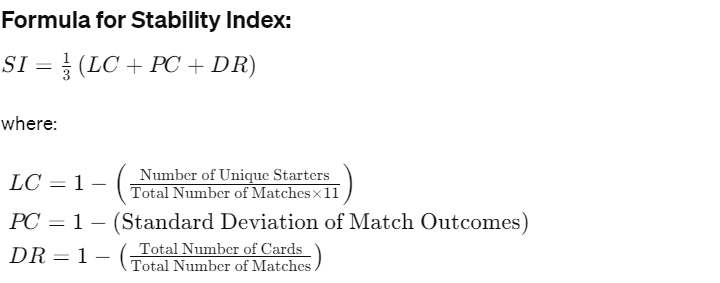

#### Assumptions:
- The maximum number of starting players in a match is 11.
- Match outcomes are quantified as 3 points for a win, 1 point for a draw, and 0 points for a loss.
- Yellow cards count as 1, red cards as 2.

#### Explanation:
- **Lineup Consistency (LC)**: We normalize the number of unique starters by the total possible number of starting positions across all matches (Total Number of Matches × 11). A team that uses all its players equally would have an LC of 0, while a team that always uses the same starting lineup would have an LC close to 1.

- **Performance Consistency (PC)**: We use the standard deviation of match outcomes to evaluate performance consistency. A lower standard deviation indicates that the team's performance (win/draw/loss) is more consistent.

- **Disciplinary Record (DR)**: This metric is normalized by the number of matches to account for teams playing different numbers of matches (due to potential match cancellations or other reasons). A DR close to 1 indicates a team has very few cards per match, reflecting a stable disciplinary record.


### 2.1 LineUp Consistency (LC)

Steps to Calculate LC:

1. From the lineups_SL dataset, count the number of unique starters for each team. A "starter" is a player listed in the starting lineup.
2. Count the total number of matches for each team. Multiply this by 11 to get the total possible number of starting positions across all matches.
3. Calculate the LC for each team using the formula LC = 1 - (Number of Unique Starters / (Total Number of Matches × 11)). --> normalization

This will give us a measure of how often the team changes its starting lineup. A higher LC value indicates a more consistent starting lineup, whereas a lower value indicates more variation in the starting players throughout the season.

In [ ]:
# Step 1: Count the number of unique starters for each team
unique_starters = lineups_SL[lineups_SL['Status'] == 'Starting'].groupby('Club')['Player'].nunique()

# Step 2: Count the total number of matches for each team for parameter LC
total_matches = pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).value_counts() #LC (overall)
total_home_matches = m_info_SL['Home Team'].value_counts() #subparameter LC Home
total_away_matches = m_info_SL['Away Team'].value_counts() #subparameter LC Away

# Step 3: Calculate the LC for each team -> normalization [0, 1]
LC = 1 - (unique_starters / (total_matches * 11)) #LC (overall)
LC_home = 1 - (unique_starters / (total_home_matches * 11)) #subparameter LC Home
LC_away = 1 - (unique_starters / (total_away_matches * 11)) #subparameter LC Away


In [ ]:
# Create a DataFrame to hold all LC values
LC_values = pd.DataFrame({
    'LC': LC,
    'LC Home': LC_home,
    'LC Away': LC_away
})

# Display the DataFrame with all LC values
LC_values = LC_values.sort_values(by='LC', ascending=False)
LC_values

,LC,LC Home,LC Away
FC St. Gallen 1879,0.936869,0.873737,0.873737
Grasshopper Club Zurich,0.936869,0.873737,0.873737
Servette FC,0.936869,0.873737,0.873737
FC Lugano,0.934343,0.868687,0.868687
FC Winterthur,0.934343,0.868687,0.868687
FC Sion,0.931818,0.863636,0.863636
BSC Young Boys,0.929293,0.858586,0.858586
FC Zürich,0.929293,0.858586,0.858586
FC Basel 1893,0.926768,0.853535,0.853535
FC Luzern,0.926768,0.853535,0.853535


**Visualization**

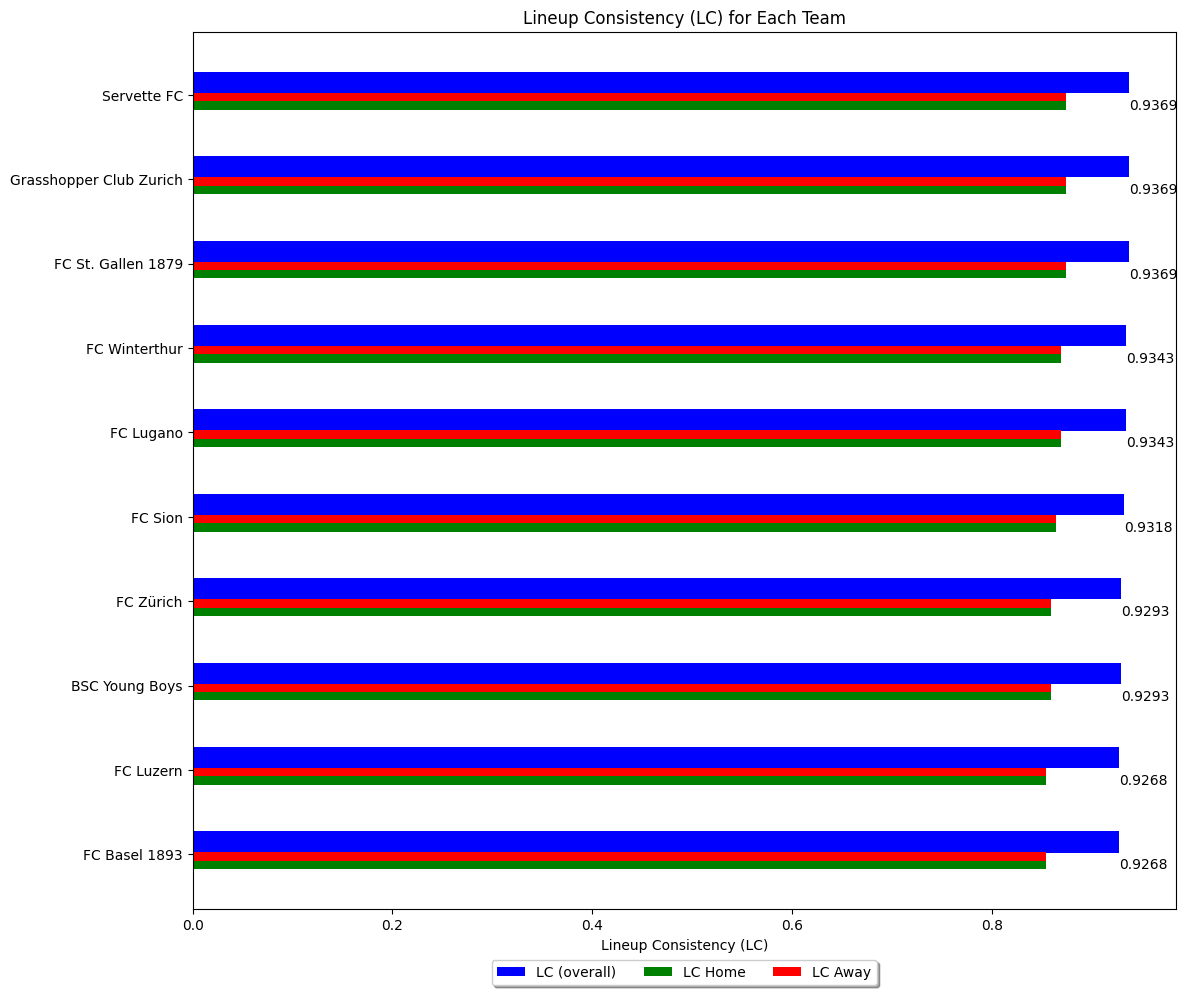

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# concatenate LC, LC_home, and LC_away into 1 DataFrame
LC_values = pd.concat([LC, LC_home, LC_away], axis=1)
LC_values.columns = ['LC', 'LC Home', 'LC Away']


# Adjusting the column names to match the DataFrame for the bar chart plotting
LC_sorted.columns = ['LC_overall', 'LC_Home', 'LC_Away']
LC_sorted = LC_sorted.sort_values(by='LC_overall', ascending=True)

# Plotting the bar chart according to the specified requirements
fig, ax = plt.subplots(figsize=(12, 10))

# Set the positions of the bars
indices = np.arange(len(LC_sorted))
blue_bar_width = 0.25  # thicker width for the blue bar
green_red_bar_width = 0.1  # width for the green and red bars

# Plot each LC value with the blue bar on top
ax.barh(indices + blue_bar_width / 1.7, LC_sorted['LC_overall'], height=blue_bar_width, color='blue', label='LC (overall)')
ax.barh(indices - blue_bar_width / 2, LC_sorted['LC_Home'], height=green_red_bar_width, color='green', label='LC Home')
ax.barh(indices - blue_bar_width / 2 + green_red_bar_width, LC_sorted['LC_Away'], height=green_red_bar_width, color='red', label='LC Away')

# Add labels and title
ax.set_xlabel('Lineup Consistency (LC)')
ax.set_title('Lineup Consistency (LC) for Each Team')

# Adding the exact value of the blue bars in the graph
for index, value in enumerate(LC_sorted['LC_overall']):
    ax.text(value, index - blue_bar_width / 2, f"{value:.4f}", va='center', ha='left')

# Set the y-ticks to the middle of the group of bars for each team
ax.set(yticks=indices, yticklabels=LC_sorted.index)
ax.legend()

# Place the legend outside the graph, at the lower left
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()


Result: 
- only minor variations exist between teams' LC, LC Home, and LC Away, but these are not substantial enough to indicate a different strategy for home vs. away games.
- Across the board, the teams display high levels of lineup consistency.
- In general, the teams in this league seem to rely on a consistent selection of players, possibly to leverage established team dynamics and to minimize the disruptions caused by frequent lineup changes.

However, we need to consider more factors - let's define our next parameter



### 2.2 Performance Consistency (PC)

Steps to calculate PC:

1. **Initialize Points Dictionary** Create a dictionary (`points_dict`) that holds a list of points for each team, ensuring every team from the `m_info_SL` dataset is included.
2. **Aggregate Points** Loop through each match in the `m_info_SL` dataset, adding the match points to the appropriate team in `points_dict` based on whether they are the home or away team.
3. **Calculate Average Points** For each team in `points_dict`, compute the average points they earned per match. This average is then sorted to show teams with the highest to lowest average points.
4. **Calculate Standard Deviation** Compute the standard deviation of points for each team to measure the variability of their match outcomes.
5. **Determine Maximum Standard Deviation** Find the maximum standard deviation possible with the given point system for wins, draws, and losses, using sample standard deviation (ddof=1) to reflect that the dataset may represent a sample of a larger set of matches.
6. **Normalize Standard Deviation** Normalize the standard deviation values by dividing each team's standard deviation by the maximum possible standard deviation, and subtract from 1 to get the PC score. This inverses the measure so that a higher score indicates greater consistency.
7. **Create PC DataFrame** Convert the dictionary of PC scores into a pandas DataFrame for easy analysis and visualization, and sort it to prepare for further analysis.

In [ ]:
# Step1: Initialize a dictionary to hold the points per team
points_dict = {team: [] for team in pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).unique()}

# Step 2: Iterate through the matches and append the points to the respective team
for i, row in m_info_SL.iterrows():
    points_dict[row['Home Team']].append(row['HomeTeamPoints'])
    points_dict[row['Away Team']].append(row['AwayTeamPoints'])

# Step 3: Calculate the average points per team
average_points = {team: sum(points) / len(points) for team, points in points_dict.items()}
average_points = pd.Series(average_points)
avg_pts = average_points.sort_values(ascending=False) # shows the teams with the highest to lowest average points

# Step 4: Calculate the standard deviation of the points per team
std_dev = {team: np.std(points) for team, points in points_dict.items()}

# Step 5: Calculate the maximum possible standard deviation possible in the given point system (which is between 0 points for a loss, 1 point for a draw and 3 points for a win).
max_std_dev = np.std([0, 1, 3], ddof=1) # ddof=1 -> sample standard deviation (dataset is only a sample of a larger set of seasons), ddof=0 -> population standard dev (e.g. if we had all seasons)

# Step 6: normalize the standard deviation to get the parameter PC
PC_scores = {team: 1 - (std_dev / max_std_dev) for team, std_dev in std_dev.items()}

# Step 7: Convert the PC score to a DataFrame
PC_df = pd.DataFrame.from_dict(PC_scores, orient='index', columns=['Performance Consistency']).reset_index()
PC_df.rename(columns={'index': 'Team'}, inplace=True)

PC_df.head(10).sort_values(by='Performance Consistency')


,Team,Performance Consistency
8,Grasshopper Club Zurich,0.139337
4,FC Luzern,0.165081
2,FC Lugano,0.178054
6,FC St. Gallen 1879,0.192668
7,FC Basel 1893,0.215941
1,FC Winterthur,0.216574
5,FC Zürich,0.226771
3,Servette FC,0.239709
0,BSC Young Boys,0.244946
9,FC Sion,0.257533


Brief Interpretation:
The PC results indicate that FC Sion has the most consistent performance across matches with a score of 0.258, suggesting their match outcomes were less variable compared to other teams. Conversely, Grasshopper Club Zurich, with the lowest score of 0.139, experienced greater fluctuations in their match results, indicating a less predictable performance over the season.

**IMPORTANT**  A lower standard deviation (and thus a higher PC score!) indicates more consistent performance across matches.

General Interpretation:
- Higher PC scores - e.g. FC Winterthur - indicate a team had a more consistent performance level throughout the season, with fewer fluctuations in match outcomes. This could be seen as a sign of stability, suggesting the team was able to perform closer to their expected level in most matches.
- Lower PC scores reveal greater variability in performance, indicating a team's match outcomes were more unpredictable. This might reflect inconsistency in playing style, tactical adjustments, injuries, or other factors influencing match results.
- The PC score is a reflection of how predictably a team performed in terms of match results, not necessarily their success in terms of standings or championships. It's important to consider that consistency doesn't always correlate with being the top of the league; a team could consistently win, draw, or even lose.

*Remark on Step 4: We are normalizing the standard deviation by dividing by the maximum possible standard deviation. This method assumes that the range of outcomes (0, 1, 3) is evenly distributed, which might not be the case. This approach might slightly skew the PC scores if the distribution of wins, draws, and losses is not uniform.*

**Visualization**

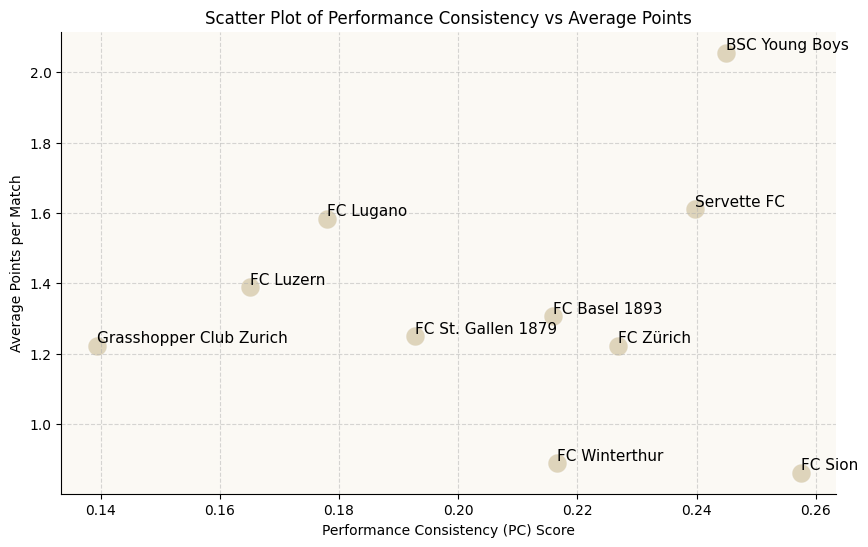

In [ ]:
import matplotlib.pyplot as plt

# Merging average points with the PC scores
# 'Team' is set as the index for 'average_points' to match the merge
scatter_data = PC_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(scatter_data['Performance Consistency'], scatter_data['AveragePoints'], 
                           color='#D3C5A3', alpha=0.7, edgecolors='w', s=200)

# Label the axes
plt.xlabel('Performance Consistency (PC) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Performance Consistency vs Average Points')

# Label each data point with the Team name
for i, point in scatter_data.iterrows():
    plt.text(point['Performance Consistency'], point['AveragePoints'], point['Team'],
             fontsize=11, ha='left', va='bottom')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4') # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


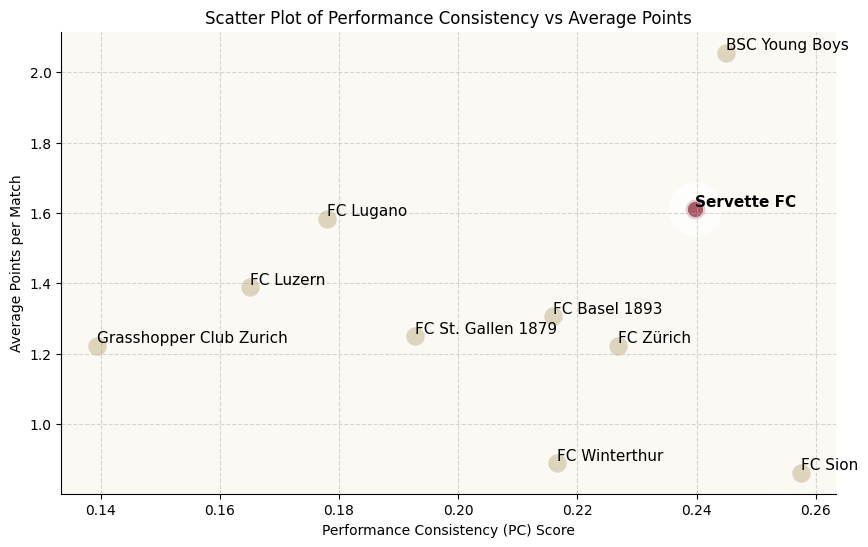

In [ ]:
import matplotlib.pyplot as plt

# Merging average points with the PC scores
scatter_data = PC_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
for i, point in scatter_data.iterrows():
    if point['Team'] == 'Servette FC':
        plt.scatter(point['Performance Consistency'], point['AveragePoints'], color='#85142b', edgecolors='#ffffff', s=200, alpha=0.7, linewidths=25)
        plt.text(point['Performance Consistency'], point['AveragePoints'], point['Team'], 
                 fontsize=11, fontweight='bold', ha='left', va='bottom')
    else:
        # Plot other teams in a default color
        plt.scatter(point['Performance Consistency'], point['AveragePoints'], color='#D3C5A3', edgecolors='w', s=200, alpha=0.7)
        plt.text(point['Performance Consistency'], point['AveragePoints'], point['Team'], 
                 fontsize=11, ha='left', va='bottom')

# Label the axes
plt.xlabel('Performance Consistency (PC) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Performance Consistency vs Average Points')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4')  # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


### 2.3 Disciplinary Record (DR)

Steps to calculate DR:
1. **Identify Disciplinary Events** Extract events from the match_events_2022_2023_SL dataset that correspond to disciplinary actions, such as yellow cards and red cards.
2. **Assign Card Values** Assign a numerical value to each type of card (1 point for a yellow card, 3 points for a yellow-red card and 5 points for direct Red Card), as per the given instructions.
3. **Aggregate Cards per Team** Sum the total points for cards received by each team over the season.
4. **Count Total Matches** Determine the total number of matches played by each team to normalize the disciplinary points.
5. **Calculate DR** Normalize the total disciplinary points by the total number of matches to get the Disciplinary Record for each team. The formula for DR is DR = 1 - (Total Number of Cards / Total Number of Matches).
6. **Normalize DR** Ensure that the DR value is between 0 and 1, where 1 would indicate no cards received (perfect discipline) and values closer to 0 indicate more frequent disciplinary actions.

In [ ]:
#events_SL.head(50)

#show all unique values in the 'Event' column
events_SL['Event'].value_counts()

Event
Substitution       1606
Yellow Card         893
Goal                535
Direct Red Card      32
Yellow-Red Card      26
Name: count, dtype: int64

In [ ]:
# Step 1: Identify Desciplinary Events
yc = events_SL[events_SL['Event'] == 'Yellow Card']
y2c = events_SL[events_SL['Event'] == 'Yellow-Red Card']
rc = events_SL[events_SL['Event'] == 'Direct Red Card']

# Check: show the distribution of the direct red cards
rc['Club'].value_counts()

Club
FC St. Gallen 1879         6
FC Basel 1893              5
FC Sion                    4
FC Zürich                  4
FC Luzern                  3
BSC Young Boys             3
Grasshopper Club Zurich    2
FC Winterthur              2
Servette FC                2
FC Lugano                  1
Name: count, dtype: int64

**Disciplinary Points Assignment**

The point system for disciplinary actions in matches is defined as follows:
- **Yellow Card (YC)** Assigned **1 point**. Represents a common offense that warns a player without immediate dismissal from the match. Yellows are factored into stability but have a lesser impact compared to dismissals.
- **Second Yellow Card leading to Red (Y2C)** Assigned **3 points**. Signifies a player's second caution in a match leading to dismissal. This has a significant impact, as the team must continue with one fewer player, disrupting the team's structure and strategy.
- **Direct Red Card (RC)** Assigned **4 points**. Indicates severe offenses resulting in immediate ejection and usually a suspension for subsequent matches. This has the highest impact on team stability, affecting not only the current match but also future lineups and strategic planning.

The gaps in points between YC, Y2C, and RC reflect the escalating impact on the team's stability and the game's dynamics. A direct red card is weighted most heavily, recognizing its substantial influence on a match and the greater disciplinary implications for the team.

In [ ]:
# step 2: assign Card values
yc = yc.copy()
yc.loc[:, 'D_Pts'] = 1
y2c = y2c.copy()
y2c.loc[:, 'D_Pts'] = 3
rc = rc.copy()
rc.loc[:, 'D_Pts'] = 5

# combine all cards into one DataFrame
all_cards = pd.concat([yc, y2c, rc])

# Step 3: Aggregate Cards per Team
D_pts_per_team = all_cards.groupby('Club')['D_Pts'].sum()

D_pts_per_team.sort_values(ascending=False)

Club
FC Sion                    132
FC Zürich                  131
FC Luzern                  130
FC St. Gallen 1879         126
FC Basel 1893              115
Grasshopper Club Zurich    108
FC Lugano                  107
FC Winterthur              103
BSC Young Boys              92
Servette FC                 87
Name: D_Pts, dtype: int64

In [ ]:
# Step 4: Count Total Matches per Team
total_matches = pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).value_counts()

total_matches

BSC Young Boys             36
FC Winterthur              36
FC Lugano                  36
Servette FC                36
FC Luzern                  36
FC Zürich                  36
FC St. Gallen 1879         36
FC Basel 1893              36
Grasshopper Club Zurich    36
FC Sion                    36
Name: count, dtype: int64

Remark `D_pts_per Team` using a logarithmic approach: 
The idea behind using a logarithmic approach is to moderate the impact of very high disciplinary points, thereby preventing them from overshadowing the differences between teams with lower points.

In [ ]:
# Apply log transformation with a shift (to handle cases where D_pts_per_team could be 0)
log_D_pts_per_team = np.log(D_pts_per_team + 1)

# Step 5: Calculate the Disciplinary Points (DP) for each team
# Normalize the log-transformed points to get values between 0 and 1
min_log_pts = log_D_pts_per_team.min()
range_log_pts = log_D_pts_per_team.max() - min_log_pts
normalized_log_D_pts = (log_D_pts_per_team - min_log_pts) / range_log_pts

# Step 6: Normalize the DP values to get the parameter DP
# Use normalized log-transformed disciplinary points to calculate DR
DR_log_transformed = 1 - normalized_log_D_pts

# Convert to DataFrame for easier handling
DR_log_df = DR_log_transformed.reset_index()
DR_log_df.columns = ['Team', 'Disciplinary Record']

DR_log_df.head(10).sort_values(by='Disciplinary Record')

,Team,Disciplinary Record
4,FC Sion,0.000000
7,FC Zürich,0.018274
3,FC Luzern,0.036686
5,FC St. Gallen 1879,0.111769
1,FC Basel 1893,0.331126
8,Grasshopper Club Zurich,0.481829
2,FC Lugano,0.504145
6,FC Winterthur,0.595523
0,BSC Young Boys,0.866196
9,Servette FC,1.000000


Brief Interpretation:

The Disciplinary Record (DR) calculated with a logarithmic transformation and normalization presents a nuanced view of teams' disciplinary actions throughout the season. This method effectively spreads out the values, particularly highlighting differences among teams with lower incidences of cards.
- Teams like **Servette FC** exhibit a high DR value, indicating fewer disciplinary actions relative to others. This suggests a high level of on-field discipline or fewer instances that warranted cards.
- On the other hand, **FC Sion** shows a DR value of 0, denoting the highest relative frequency of disciplinary actions (cards received) among all teams. This could reflect a more aggressive playstyle or a tendency towards actions that referees penalized more severely.
- The rest of the teams fall between these two extremes, with their DR values providing insight into their relative disciplinary records. Teams closer to Servette FC on this scale demonstrate better discipline, while those nearer to FC Sion encountered more disciplinary issues.

This log-transformed DR approach offers a refined perspective on team behavior, emphasizing the impact of even a few disciplinary actions on the overall stability index of a team.


In [ ]:
average_points.head(10).sort_values(ascending=False)
average_points

BSC Young Boys             2.055556
FC Winterthur              0.888889
FC Lugano                  1.583333
Servette FC                1.611111
FC Luzern                  1.388889
FC Zürich                  1.222222
FC St. Gallen 1879         1.250000
FC Basel 1893              1.305556
Grasshopper Club Zurich    1.222222
FC Sion                    0.861111
dtype: float64

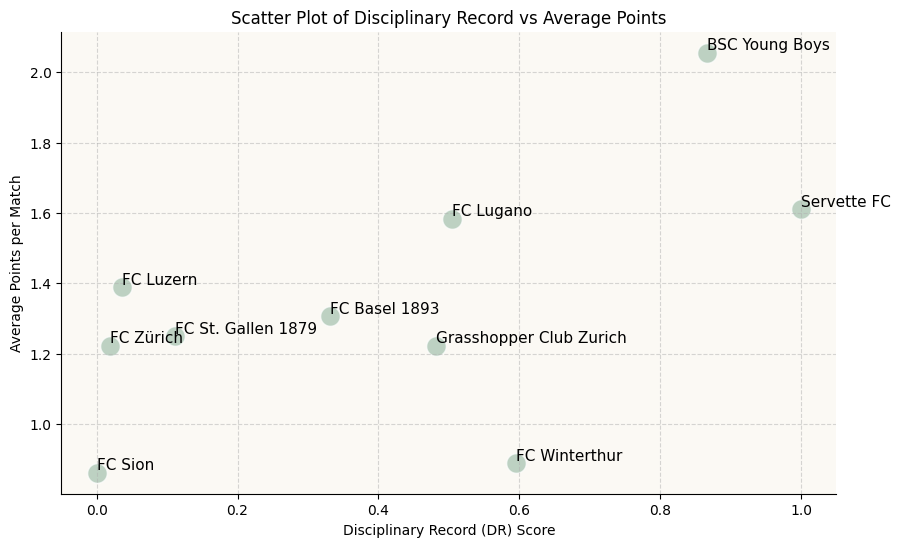

In [ ]:
import matplotlib.pyplot as plt

# Merging average points with the DR scores
# Ensure 'average_points' is a Series with the team name as the index to facilitate the merge
scatter_data_DR = DR_log_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot for DR vs. Average Points
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(scatter_data_DR['Disciplinary Record'], scatter_data_DR['AveragePoints'], 
                           color='#A3C1AD', alpha=0.7, edgecolors='w', s=200)

# Label the axes
plt.xlabel('Disciplinary Record (DR) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Disciplinary Record vs Average Points')

# Label each data point with the Team name
for i, point in scatter_data_DR.iterrows():
    plt.text(point['Disciplinary Record'], point['AveragePoints'], point['Team'],
             fontsize=11, ha='left', va='bottom')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4') # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [ ]:
## TODO: wär cool die datenpunkte mit den teamlogos zu ersetzen

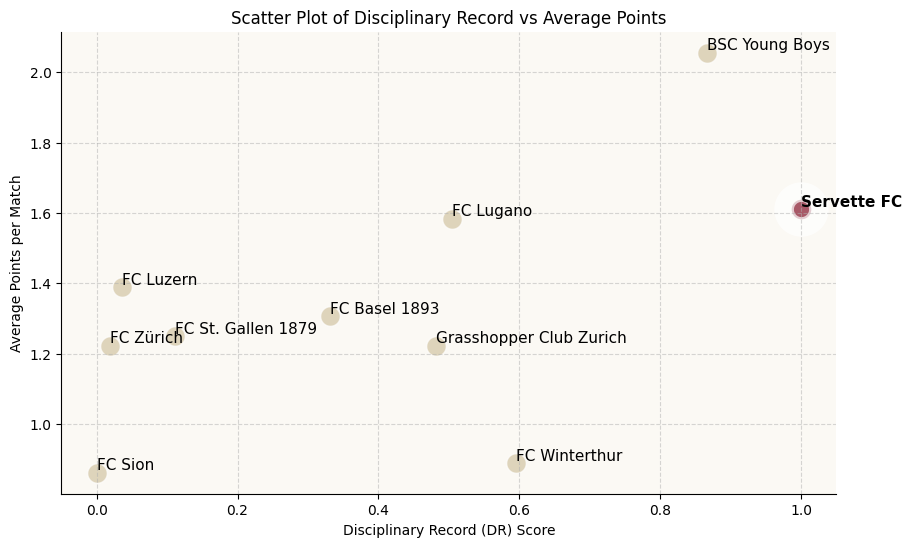

In [ ]:
import matplotlib.pyplot as plt

scatter_data_DR = DR_log_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot for DR vs. Average Points
plt.figure(figsize=(10, 6))
for i, point in scatter_data_DR.iterrows():
    if point['Team'] == 'Servette FC':
        plt.scatter(point['Disciplinary Record'], point['AveragePoints'], color='#85142b', edgecolors='#ffffff', s=200, alpha=0.7, linewidths=25)
        plt.text(point['Disciplinary Record'], point['AveragePoints'], point['Team'], 
                 fontsize=11, fontweight='bold', ha='left', va='bottom')
    else:
        # Plot other teams in a default color
        plt.scatter(point['Disciplinary Record'], point['AveragePoints'], color='#D3C5A3', edgecolors='w', s=200, alpha=0.7)
        plt.text(point['Disciplinary Record'], point['AveragePoints'], point['Team'], 
                 fontsize=11, ha='left', va='bottom')

# Label the axes
plt.xlabel('Disciplinary Record (DR) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Disciplinary Record vs Average Points')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4')  # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


### 2.4 Calculation of Stability Index (SI)

The Stability Index (SI) is a composite score that combines three key aspects of team stability throughout the season: Lineup Consistency (LC), Performance Consistency (PC), and Disciplinary Record (DR). Each component is weighted equally in the final index to reflect their importance in team stability (cf [Introduction Chapter 2](#2))



In [ ]:
LC_values

,LC,LC Home,LC Away
FC St. Gallen 1879,0.936869,0.873737,0.873737
Grasshopper Club Zurich,0.936869,0.873737,0.873737
Servette FC,0.936869,0.873737,0.873737
FC Lugano,0.934343,0.868687,0.868687
FC Winterthur,0.934343,0.868687,0.868687
FC Sion,0.931818,0.863636,0.863636
BSC Young Boys,0.929293,0.858586,0.858586
FC Zürich,0.929293,0.858586,0.858586
FC Basel 1893,0.926768,0.853535,0.853535
FC Luzern,0.926768,0.853535,0.853535


In [ ]:
# make a dataframe for LC_values named LC_df
LC_df = LC_values.reset_index()
# rename the index column to 'Team'
LC_df.rename(columns={'index': 'Team'}, inplace=True)


LC_df

,Team,LC,LC Home,LC Away
0,FC St. Gallen 1879,0.936869,0.873737,0.873737
1,Grasshopper Club Zurich,0.936869,0.873737,0.873737
2,Servette FC,0.936869,0.873737,0.873737
3,FC Lugano,0.934343,0.868687,0.868687
4,FC Winterthur,0.934343,0.868687,0.868687
5,FC Sion,0.931818,0.863636,0.863636
6,BSC Young Boys,0.929293,0.858586,0.858586
7,FC Zürich,0.929293,0.858586,0.858586
8,FC Basel 1893,0.926768,0.853535,0.853535
9,FC Luzern,0.926768,0.853535,0.853535


In [ ]:
import pandas as pd

# Assuming LC_df, PC_df, and DR_log_df contain the 'Team' column and their respective scores
# First, ensure all DataFrames have the same 'Team' column for accurate merging
LC_df.rename(columns={'Lineup Consistency': 'LC'}, inplace=True)
PC_df.rename(columns={'Performance Consistency': 'PC'}, inplace=True)
DR_log_df.rename(columns={'Disciplinary Record': 'DR'}, inplace=True)

# Merge the DataFrames on the 'Team' column
merged_df = LC_df.merge(PC_df, on='Team').merge(DR_log_df, on='Team')

# Calculate the Stability Index (SI) for each team
merged_df['SI'] = (merged_df['LC'] + merged_df['PC'] + merged_df['DR']) / 3

# Sort the teams by their Stability Index in descending order
merged_df.sort_values(by='SI', ascending=False, inplace=True)

# Display the DataFrame with Stability Index
print(merged_df[['Team', 'SI']])


                      Team        SI
2              Servette FC  0.725526
6           BSC Young Boys  0.680145
4            FC Winterthur  0.582147
3                FC Lugano  0.538847
1  Grasshopper Club Zurich  0.519345
8            FC Basel 1893  0.491278
0       FC St. Gallen 1879  0.413768
5                  FC Sion  0.396451
7                FC Zürich  0.391446
9                FC Luzern  0.376178


Brief interpretation:

The Stability Index (SI) quantitatively reflects each team's consistency in lineup selection, match performance, and discipline throughout the season. Servette FC leads with the highest SI score, indicating a well-balanced approach to maintaining a stable lineup, securing consistent match results, and minimizing disciplinary actions. This suggests Servette FC's strategies and team management contribute significantly to its stability across these domains.

Conversely, teams like FC Luzern and FC Zürich exhibit lower SI scores, pointing to challenges in maintaining consistency in lineup, performance, and discipline, which could impact their overall competitive stability.

The SI provides valuable insights into how teams manage their players and performances over a season, highlighting the importance of consistency and discipline in achieving long-term success.


**Visualization**

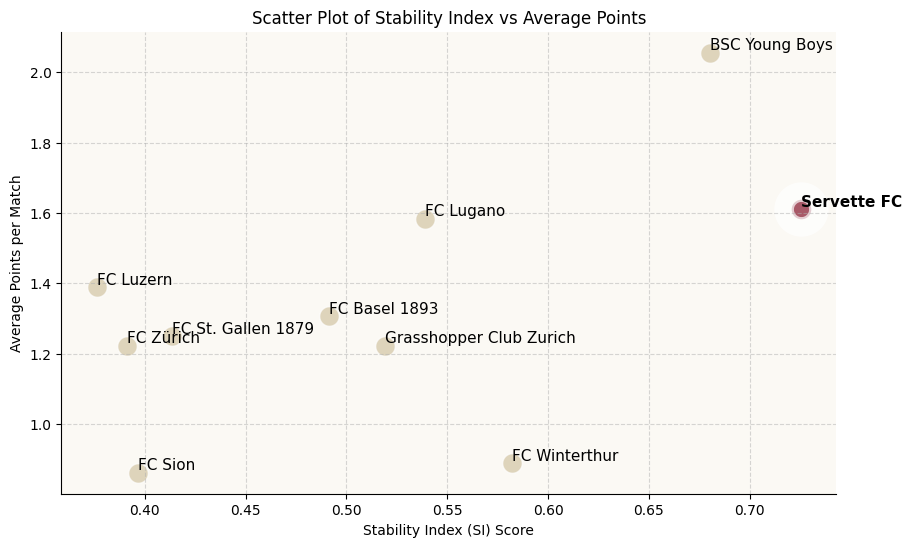

In [ ]:
import matplotlib.pyplot as plt

# Merging average points with the SI scores
scatter_data_SI = merged_df.merge(average_points.rename('AveragePoints'), left_on='Team', right_index=True)

# Create the scatter plot for SI vs. Average Points
plt.figure(figsize=(10, 6))
for i, point in scatter_data_SI.iterrows():
    if point['Team'] == 'Servette FC':
        # Highlight Servette FC with a unique color and bold label
        plt.scatter(point['SI'], point['AveragePoints'], color='#85142b', edgecolors='#ffffff', s=200, alpha=0.7, linewidths=25)
        plt.text(point['SI'], point['AveragePoints'], point['Team'], 
                 fontsize=11, fontweight='bold', ha='left', va='bottom')
    else:
        # Plot other teams in a default color
        plt.scatter(point['SI'], point['AveragePoints'], color='#D3C5A3', edgecolors='w', s=200, alpha=0.7)
        plt.text(point['SI'], point['AveragePoints'], point['Team'], 
                 fontsize=11, ha='left', va='bottom')

# Label the axes
plt.xlabel('Stability Index (SI) Score')
plt.ylabel('Average Points per Match')

# Add a title
plt.title('Scatter Plot of Stability Index vs Average Points')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhance the visual appeal with aesthetics
plt.gca().set_facecolor('#FBF9F4')  # Set a background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


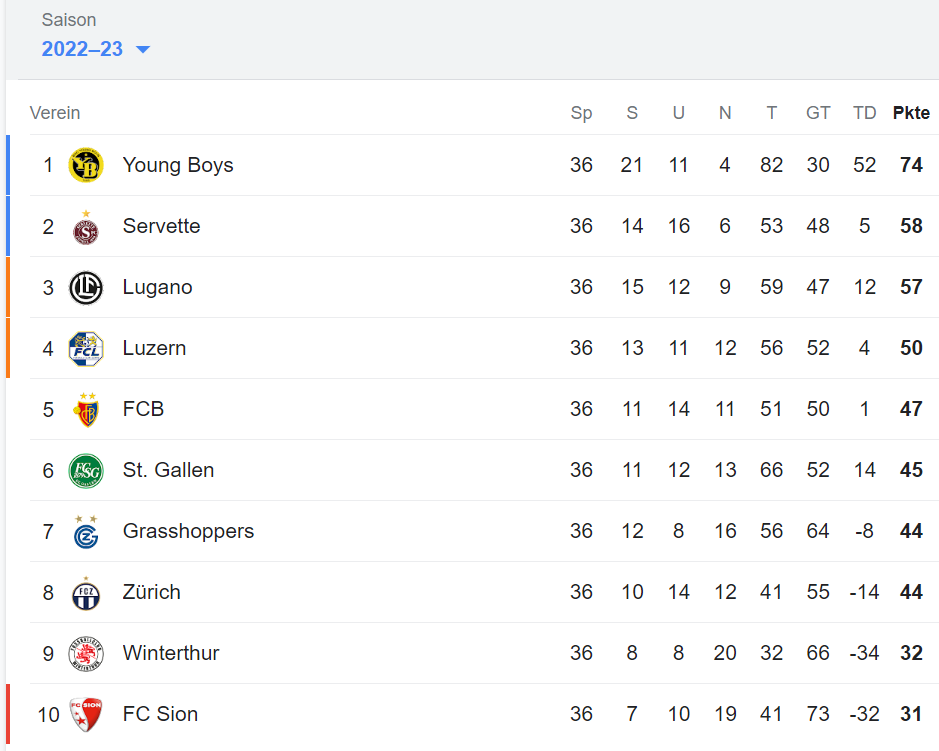

## Success Index (SuI)